In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ROC1 = np.loadtxt("ROC_NN3x30.dat")
ROC2 = np.loadtxt("ROC_NN5x30.dat")

In [3]:
np.shape(ROC1)

(4059, 2)

In [4]:
#Calcolo l'AUC del primo network
AUC1 = 0
for i in range(len(ROC1)-1):
    AUC1 += (ROC1[i+1][0]-ROC1[i][0])*ROC1[i][1]
print(AUC1)

0.9780699351187233


In [5]:
#Calcolo l'AUC del secondo network
AUC2 = 0
for i in range(len(ROC2)-1):
    AUC2 += (ROC2[i+1][0]-ROC2[i][0])*ROC2[i][1]
print(AUC2)

0.9811925785861945


In [6]:
#Trovo dove tagliare per il primo network
for i in range(len(ROC1)):
    if ROC1[i][1]<0.99:
        a = i
a = ROC1[a+1][0]
print(a)

0.24721603563474387


In [7]:
#Trovo dove tagliare per il secondo network
for i in range(len(ROC2)):
    if ROC2[i][1]<0.99:
        b = i
b = ROC1[b+1][0]
print(b)

0.8418708240534521


In [8]:
predFake1, trueFake1 = np.split(np.loadtxt("FAKE_NN3x30.dat"), 2, 1)
predFake2, trueFake2 = np.split(np.loadtxt("FAKE_NN5x30.dat"), 2, 1)

In [9]:
#Calcolo la frazione di fake events tagliati nel primo network
totFake1 = np.count_nonzero(trueFake1-1)
cutFake1 = 0
for i in range(len(predFake1)):
    if predFake1[i] < a and trueFake1[i]==0:
        cutFake1 += 1
print(cutFake1/totFake1)

0.6080178173719376


In [10]:
#Calcolo la frazione di fake events tagliati nel secondo network
totFake2 = np.count_nonzero(trueFake2-1)
cutFake2 = 0
for i in range(len(predFake2)):
    if predFake2[i] < a and trueFake2[i]==0:
        cutFake2 += 1
print(cutFake2/totFake2)

0.7900943396226415


In [19]:
fakeGraph1 = [predFake1[i] if trueFake1[i]==0 else None for i in range(len(trueFake1))]
fakeGraph1 = np.array([x for x in fakeGraph1 if x is not None])
trueGraph1 = [predFake1[i] if trueFake1[i]==1 else None for i in range(len(trueFake1))]
trueGraph1 = np.array([x for x in trueGraph1 if x is not None])

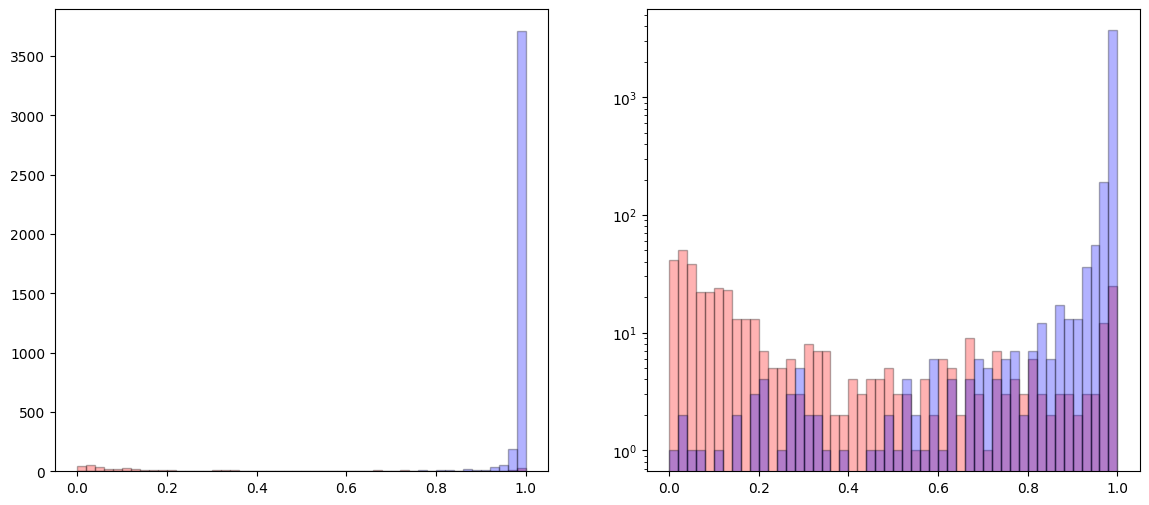

In [41]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(fakeGraph1, bins=0.02*np.arange(51), color='red', alpha=0.3, ec="k")
plt.hist(trueGraph1, bins=0.02*np.arange(51), color='blue', alpha=0.3, ec="k")
plt.subplot(1, 2, 2)
plt.hist(fakeGraph1, bins=0.02*np.arange(51), color='red', alpha=0.3, ec="k")
plt.hist(trueGraph1, bins=0.02*np.arange(51), color='blue', alpha=0.3, ec="k")
plt.yscale('log')
plt.show()

In [32]:
fakeGraph2 = [predFake2[i] if trueFake2[i]==0 else None for i in range(len(trueFake2))]
fakeGraph2 = np.array([x for x in fakeGraph2 if x is not None])
trueGraph2 = [predFake2[i] if trueFake2[i]==1 else None for i in range(len(trueFake2))]
trueGraph2 = np.array([x for x in trueGraph2 if x is not None])

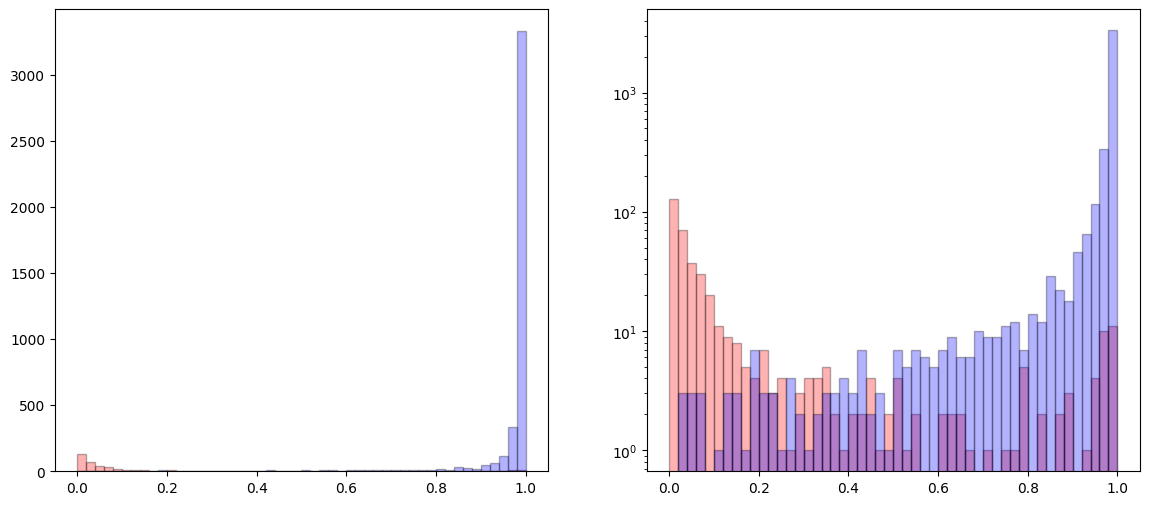

In [40]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(fakeGraph2, bins=0.02*np.arange(51), color='red', alpha=0.3, ec="k")
plt.hist(trueGraph2, bins=0.02*np.arange(51), color='blue', alpha=0.3, ec="k")
plt.subplot(1, 2, 2)
plt.hist(fakeGraph2, bins=0.02*np.arange(51), color='red', alpha=0.3, ec="k")
plt.hist(trueGraph2, bins=0.02*np.arange(51), color='blue', alpha=0.3, ec="k")
plt.yscale('log')
plt.show()